In [2]:
%matplotlib inline
import pykat
import pylab as pl
import pandas
import matplotlib.pyplot as plt
import matplotlib
import csv
import math
import numpy as np
from pykat.parallel import parakat
import pprint

pandas.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [3]:
#Perfct Mode-Matching Conditions

katfile = './aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat'
basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)

basekat.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor

# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

#sq sqz 0 10 0 nsqz

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans
xaxis darm f log 5 5k 50
yaxis re:im
""")

basekat.undumpNodes() #undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code

trace_out = kat.run(getTraceData=True)

out = kat.run()

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-08-25 12:14:16.156445


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 14.134 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-25 12:14:30.290666

Finished in 13.3811 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [4]:
x = kat.trace
print(x)

None


In [5]:
# [access object][trace data]['name']
outdict = trace_out[1][0]

In [6]:
# [access object][trace data]
outdict = trace_out[1][0]

#parse the output to name and q's
dictlist = []
for key, value in outdict.items():
    temp = [key,value]
    dictlist.append(temp)


nodename_list = []
q_x_list = []
q_y_list = []

#[node_list][key/parameters][x/y]
for i in range(len(dictlist)):
    nodename_list.append(dictlist[i][0])
    q_x_list.append(dictlist[i][1][0]._gauss_param__q)
    q_y_list.append(dictlist[i][1][1]._gauss_param__q)

In [10]:
comp_node_list = []

for i in range(len(nodename_list)):
    node = nodename_list[i]
    comp = kat.nodes[node].components[0].name
    comp_node_list.append([comp,node])

In [42]:
kat.nodes['nETMXs1'].components

(<pykat.components.pykat.components.mirror_201 at 0x7fc316583780>,
 <pykat.components.pykat.components.space_202 at 0x7fc3165839e8>)

In [12]:
vars(kat.components['nBSi4'].__nodesetter_nSRMHRa)

{'_NodeGaussSetter__comp': <weakref at 0x7fc316512d68; to 'pykat.components.mirror_207' at 0x7fc3165915c0>,
 '_NodeGaussSetter__name': None,
 '_NodeGaussSetter__node': <weakref at 0x7fc31650cc78; to 'Node' at 0x7fc31654ed68>}

In [34]:
###Lock in the components' node q-parameters with the gauss command

katfile1 = './aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat'
basekat1 = pykat.finesse.kat()
basekat1.loadKatFile(katfile)
basekat1.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor

# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

#sq sqz 0 10 0 nsqz

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans
xaxis darm f log 5 5k 50
yaxis re:im
""")

#for i in range(len(comp_node_list)):
for i in range(0,25,1):
    comp = comp_node_list[i][0]
    node1 = comp_node_list[i][1]
    qx1 = trace_out[1][0][node1][0]._gauss_param__q
    qy1 = trace_out[1][0][node1][1]._gauss_param__q

    real_qx1 = str(float(np.real(qx1)))
    imag_qx1 = str(float(np.imag(qx1)))
    
    real_qy1 = str(float(np.real(qy1)))
    imag_qy1 = str(float(np.imag(qy1)))

    #gauss* name component node q [qy]
    gauss1 = "gauss* " + "gaussina" + str(i) + " " + comp + " " + node1\
    + " " + real_qx1 + " " + imag_qx1 + " " + real_qy1 + " " + imag_qy1
    print(gauss1)
    try:
        basekat1.parseCommands(gauss1)
        #basekat1.parseCommands(gauss2)
    except:
        continue

    
#basekat1.parseCommands('startnode n0')

basekat1.undumpNodes() #undump the vacuum nodes

kat1=basekat1.deepcopy() #copy kat code

out_frozenq = kat1.run()

trace_out_frozenq = kat1.run(getTraceData=True)

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.
gauss* gaussina0 OMC_CM2 nOMC_CM2_refl -0.424935257028052 0.707540463523089 -0.424935265875647 0.710069128452061
gauss* gaussina1 ETMXHR nETMXs1 2203.87115214173 301.069230104416 2203.87115214173 301.069230104416
gauss* gaussina2 ly1 nITMY11 -1350.12859200328 225.95789793595 -1357.3869874089 203.666481904717
gauss* gaussina3 OMC_ARIC dump_7 0.215733181158243 1.02864231533896 0.318584232759841 1.14916190763965

--------------------------------------------------------------
Error parsing line: 'gauss* gaussina3 OMC_ARIC dump_7
0.215733181158243 1.02864231533896 0.318584232759841
1.14916190763965':
Component 'OMC_ARIC' is not attached to node dump_7
--------------------------------------------------------------

gauss* gaussina4 OMC_HROC nOMC_HROC_ret -0.204580958410138 1.02830654242983 -0.204056920865932 1.02933821354632

 99% | ETA:  0:00:00 | Calculating                                             


Finished in 17.0865 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-25 12:23:18.590153

Finished in 14.8737 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [35]:
# [access object][trace data]
dict_frozenq = trace_out_frozenq[1][0]

#parse the output to name and q's
dictlist_frozenq = []
for key, value in dict_frozenq.items():
    temp = [key,value]
    dictlist_frozenq.append(temp)

nodename_list_fq = []
q_x_list_fq = []
q_y_list_fq = []

#[node_list][key/parameters][x/y]
for i in range(len(dictlist_frozenq)):
    nodename_list_fq.append(dictlist[i][0])
    q_x_list_fq.append(dictlist_frozenq[i][1][0]._gauss_param__q)
    q_y_list_fq.append(dictlist_frozenq[i][1][1]._gauss_param__q)
    
#test to see if the nodes match up
for i in range(len(nodename_list)):
    if nodename_list[i] != nodename_list_fq[i]:
        print('Untrue! Double check nodenames!')
    else:
        continue

compare_listx=[]
for i in range(len(nodename_list_fq)):
    if q_x_list_fq[i] != q_x_list[i]:
        compare_listx.append([nodename_list_fq[i], q_x_list[i], q_x_list_fq[i]])
    else:
        continue

compare_listy=[]
for i in range(len(nodename_list_fq)):
    if q_y_list_fq[i] != q_y_list[i]:
        compare_listy.append([nodename_list_fq[i], q_y_list[i], q_y_list_fq[i]])
    else:
        continue

In [36]:
compare_listy

[['nETMXs1',
  (2203.87115214173+301.069230104416j),
  (2203.87115214173+436.439286052368j)],
 ['dump_7',
  (0.318584232759841+1.14916190763965j),
  (-0.0418711417381467+0.982996453940525j)],
 ['nBSi2',
  (-1974.95008103399+295.307037321646j),
  (-1974.95008103399+428.086232824921j)],
 ['nOPd',
  (-4.18398786566121+1.43991118008301j),
  (-4.18398786566121+2.08733986929286j)],
 ['nSRMHRb',
  (-5.30281030037173+1.43991118008301j),
  (-5.30281030037173+2.08733986929286j)],
 ['dump_0',
  (0.0552706143110608+0.993294976553312j),
  (0.0552706143110608+1.43991118008301j)],
 ['nIMFC2',
  (-8.98661504852923+7.53200586826001j),
  (-8.98661504852923+7.53200586825998j)],
 ['dump_8',
  (-0.368192784715421+19.3397813852284j),
  (-0.36819278471542+19.3397813852284j)],
 ['nBSi4',
  (-1975.06724183328+295.241243764647j),
  (-1975.06724183328+427.990856445765j)],
 ['dump_15',
  (1975.06724183328+295.241243764647j),
  (-1975.06724183328+427.990856445765j)],
 ['nWPa',
  (-4.77401921628768+1.64733998681461

In [37]:
for i in range(len(nodename_list)):
    if nodename_list[i] != nodename_list_fq[i]:
        print('Untrue! Double check nodenames!')
    else:
        continue

/home/thomasvo/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


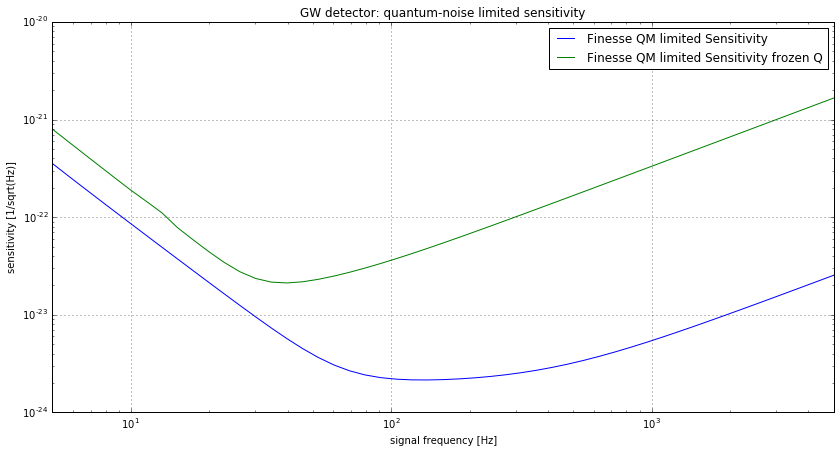

In [38]:
plt.figure(figsize=(14,7))



plt.loglog(out.x,out['NSR_with_RP'], label='Finesse QM limited Sensitivity')
plt.loglog(out.x,out_frozenq['NSR_with_RP'], label='Finesse QM limited Sensitivity frozen Q')

plt.title('GW detector: quantum-noise limited sensitivity')
plt.xlabel('signal frequency [Hz]')
plt.xlim([min(out.x),max(out.x)])

plt.legend()
plt.ylabel('sensitivity [1/sqrt(Hz)]')
plt.grid(True)